In [1]:
import pandas as pd
import numpy  as np

# `Data Overview`

In [42]:
df = pd.read_csv('/content/drive/My Drive/adult.test',skiprows=1,header=None)
data = pd.DataFrame(df.values,columns=['age','workclass','education_num','education','final_weight','marital-status','occupation','relationship','race','sex','capital-_gain','capital_loss','hours_per_week','native_country','target'])
data.head()

,age,workclass,education_num,education,final_weight,marital-status,occupation,relationship,race,sex,capital-_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  object
 1   workclass       16281 non-null  object
 2   education_num   16281 non-null  object
 3   education       16281 non-null  object
 4   final_weight    16281 non-null  object
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-_gain   16281 non-null  object
 11  capital_loss    16281 non-null  object
 12  hours_per_week  16281 non-null  object
 13  native_country  16281 non-null  object
 14  target          16281 non-null  object
dtypes: object(15)
memory usage: 1.9+ MB


In [44]:
data['target'].replace(' <=50K.',0,inplace=True)
data['target'].replace(' >50K.',1,inplace=True)
data.head()

,age,workclass,education_num,education,final_weight,marital-status,occupation,relationship,race,sex,capital-_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


# *Text Preprocessing*

In [45]:

for col in data.columns:
   if col!='target':
     print('Number of question mark in column '+str(col.upper())+' are --> ',data[col][data[col]==' ?'].count())

Number of question mark in column AGE are -->  0
Number of question mark in column WORKCLASS are -->  963
Number of question mark in column EDUCATION_NUM are -->  0
Number of question mark in column EDUCATION are -->  0
Number of question mark in column FINAL_WEIGHT are -->  0
Number of question mark in column MARITAL-STATUS are -->  0
Number of question mark in column OCCUPATION are -->  966
Number of question mark in column RELATIONSHIP are -->  0
Number of question mark in column RACE are -->  0
Number of question mark in column SEX are -->  0
Number of question mark in column CAPITAL-_GAIN are -->  0
Number of question mark in column CAPITAL_LOSS are -->  0
Number of question mark in column HOURS_PER_WEEK are -->  0
Number of question mark in column NATIVE_COUNTRY are -->  274


In [46]:
for col in data.columns:
   data[col].replace(' ?',np.nan,inplace=True)
data.head()    

,age,workclass,education_num,education,final_weight,marital-status,occupation,relationship,race,sex,capital-_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [47]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   education_num   15060 non-null  int64 
 3   education       15060 non-null  object
 4   final_weight    15060 non-null  int64 
 5   marital-status  15060 non-null  object
 6   occupation      15060 non-null  object
 7   relationship    15060 non-null  object
 8   race            15060 non-null  object
 9   sex             15060 non-null  object
 10  capital-_gain   15060 non-null  int64 
 11  capital_loss    15060 non-null  int64 
 12  hours_per_week  15060 non-null  int64 
 13  native_country  15060 non-null  object
 14  target          15060 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.8+ MB


Note: <br>1. \w will match alphanumeric characters and underscores
<br>2. [^\w] will match anything that's not alphanumeric or underscore

In [48]:
import re
def remove_non_alpha_numeric(df):
  for col in df.columns:
    if df[col].dtypes=='object':
      corpus = df[col].values
      new_corpus=[]
      for i in range(len(df[col].values)):
         new_corpus.append(re.sub(r'[^\w]',' ',corpus[i]))
      df[col]=new_corpus
      corpus=[]   
  return df    
remove_non_alpha_numeric(data)
data.head()

,age,workclass,education_num,education,final_weight,marital-status,occupation,relationship,race,sex,capital-_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never married,Machine op inspct,Own child,Black,Male,0,0,40,United States,0
1,38,Private,89814,HS grad,9,Married civ spouse,Farming fishing,Husband,White,Male,0,0,50,United States,0
2,28,Local gov,336951,Assoc acdm,12,Married civ spouse,Protective serv,Husband,White,Male,0,0,40,United States,1
3,44,Private,160323,Some college,10,Married civ spouse,Machine op inspct,Husband,Black,Male,7688,0,40,United States,1
5,34,Private,198693,10th,6,Never married,Other service,Not in family,White,Male,0,0,30,United States,0


In [49]:
def into_lower_case(df):
   for col in df.columns:
    if df[col].dtypes=='object':
      corpus = df[col].values
      new_corpus=[]
      for i in range(len(df[col].values)):
         new_corpus.append(corpus[i].lower())
      df[col]=new_corpus
      corpus=[]   
   return df    
into_lower_case(data)
data.head()   

,age,workclass,education_num,education,final_weight,marital-status,occupation,relationship,race,sex,capital-_gain,capital_loss,hours_per_week,native_country,target
0,25,private,226802,11th,7,never married,machine op inspct,own child,black,male,0,0,40,united states,0
1,38,private,89814,hs grad,9,married civ spouse,farming fishing,husband,white,male,0,0,50,united states,0
2,28,local gov,336951,assoc acdm,12,married civ spouse,protective serv,husband,white,male,0,0,40,united states,1
3,44,private,160323,some college,10,married civ spouse,machine op inspct,husband,black,male,7688,0,40,united states,1
5,34,private,198693,10th,6,never married,other service,not in family,white,male,0,0,30,united states,0


In [50]:
data.columns

Index(['age', 'workclass', 'education_num', 'education', 'final_weight',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')

In [ ]:
target = data['target']
data.drop('target',axis=1,inplace=True)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split( data,target,test_size=0.25,random_state=52)
X_tr,X_cv,Y_tr,Y_cv = train_test_split(X_train,Y_train,test_size=0.25,random_state=52)

# *Vectorizing*

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

from gensim.models import Word2Vec
list_of_sentences=[]
for col in data.columns:
  if data[col].dtypes == 'object':
    for sent in data[col].values:
      list_of_sentences.append(sent.split())

W2V_model = Word2Vec(list_of_sentences,min_count=1,size=50,workers=5)
print(W2V_model.wv.most_similar('child'))

def tfidf(feat_train,feat):
  tf = TfidfVectorizer()
  tf.fit(feat_train.values)
  #print(tf.transform(feat.values))
  return pd.DataFrame(tf.transform(feat.values).toarray())

def BOW(feat_train,feat):
  CV = CountVectorizer()
  CV.fit(feat_train)
  #print(CV.transform(feat).toarray())
  return pd.DataFrame(CV.transform(feat).toarray())


def into_normal_dist(num_feature):
  scaler = StandardScaler()
  return pd.DataFrame(scaler.fit_transform(np.array(num_feature).reshape(-1,1)))
  


[('outlying', 0.6607851386070251), ('tobago', 0.6595921516418457), ('etc', 0.6565759181976318), ('without', 0.6529181003570557), ('usvi', 0.6527791619300842), ('guam', 0.6524484753608704), ('trinadad', 0.651077389717102), ('dominican', 0.6508590579032898), ('us', 0.6468802690505981), ('acdm', 0.6446051001548767)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [58]:
data.columns


Index(['age', 'workclass', 'education_num', 'education', 'final_weight',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

# *1.TFIDF*

In [118]:
feature_train = []
feature_test = []
feature_cv = []
for col in data.columns:
  if data[col].dtypes=='object':
    #print(col)
    feature_train.append(tfidf(X_tr[col],X_tr[col]))
    feature_test.append(tfidf(X_tr[col],X_test[col]))
    feature_cv.append(tfidf(X_tr[col],X_cv[col]))
  else:
    #print('Numeric:',col)
    feature_cv.append(into_normal_dist(X_cv[col]))
    feature_train.append(into_normal_dist(X_tr[col]))
    feature_test.append(into_normal_dist(X_test[col]))


In [129]:
X_tr_tfidf = pd.concat(feature_train,axis=1)
X_test_tfidf = pd.concat(feature_test,axis=1)
X_cv_tfidf = pd.concat(feature_cv,axis=1)

In [130]:
print(X_tr.shape,X_tr_tfidf.shape)
print(X_test.shape,X_test_tfidf.shape)
print(X_cv.shape,X_cv_tfidf.shape)

(8471, 14) (8471, 147)
(3765, 14) (3765, 147)
(2824, 14) (2824, 147)


In [133]:
X_tfidf = pd.concat([X_tr_tfidf,X_test_tfidf,X_cv_tfidf])

In [135]:
import pickle
pickle.dump(X_tfidf,open('X_tfidf','wb'))

# *2. BOW*

In [139]:
feature_train = []
feature_test = []
feature_cv = []
for col in data.columns:
  if data[col].dtypes=='object':
    #print(col)
    feature_train.append(BOW(X_tr[col],X_tr[col]))
    feature_test.append(BOW(X_tr[col],X_test[col]))
    feature_cv.append(BOW(X_tr[col],X_cv[col]))
  else:
    #print('Numeric:',col)
    feature_cv.append(into_normal_dist(X_cv[col]))
    feature_train.append(into_normal_dist(X_tr[col]))
    feature_test.append(into_normal_dist(X_test[col]))

In [140]:
X_tr_bow = pd.concat(feature_train,axis=1)
X_test_bow = pd.concat(feature_test,axis=1)
X_cv_bow = pd.concat(feature_cv,axis=1)

print(X_tr.shape,X_tr_bow.shape)
print(X_test.shape,X_test_bow.shape)
print(X_cv.shape,X_cv_bow.shape)

(8471, 14) (8471, 147)
(3765, 14) (3765, 147)
(2824, 14) (2824, 147)


In [144]:
import pickle
X_bow = pd.concat([X_tr_bow,X_test_bow,X_cv_bow])
pickle.dump(X_bow,open('X_bow','wb'))

# *Model Training: Using tfidf vector data*

CV auc is 0.7740501000621075 and train auc is 0.760300289219796 for max_depth = 1
CV auc is 0.7580229107722034 and train auc is 0.7444966859170132 for max_depth = 2
CV auc is 0.7537992547098198 and train auc is 0.7362294628916524 for max_depth = 3
CV auc is 0.7381012352494651 and train auc is 0.7320368399297768 for max_depth = 4
CV auc is 0.7291874266786281 and train auc is 0.7323324591895551 for max_depth = 5
CV auc is 0.7290107653026016 and train auc is 0.7294100623550566 for max_depth = 7
CV auc is 0.7230073838934511 and train auc is 0.732324965672197 for max_depth = 9
CV auc is 0.7280663860327099 and train auc is 0.7433922538611847 for max_depth = 11
CV auc is 0.7417286591677593 and train auc is 0.7521517260418012 for max_depth = 13
CV auc is 0.7463087433579463 and train auc is 0.7849249988834659 for max_depth = 17
CV auc is 0.7531046856669656 and train auc is 0.8028072289662214 for max_depth = 20


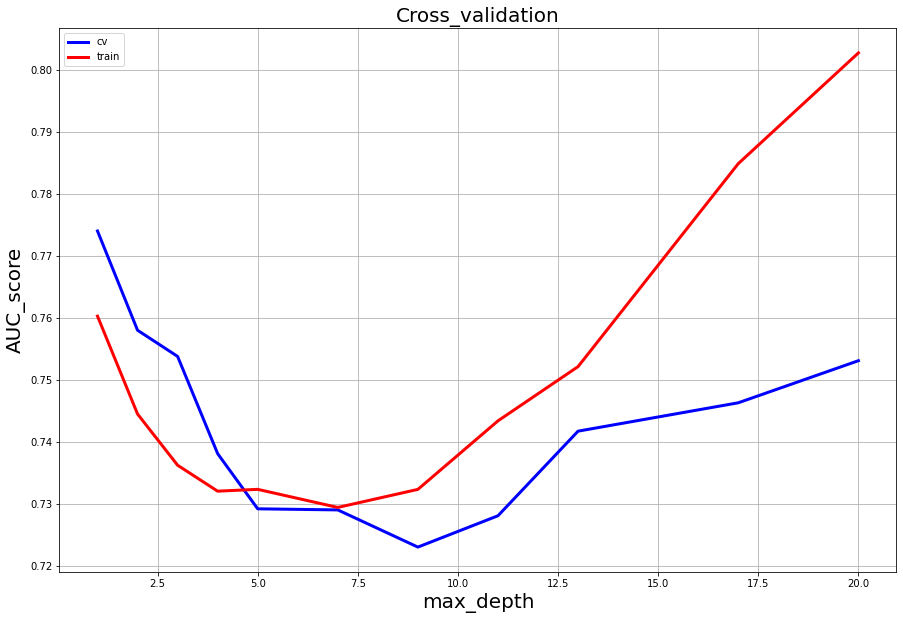

In [159]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [1,2,3,4,5,7,9,11,13,17,20]
auc_cv =[]
auc_tr = []
for i in params:
  model = GBDT(max_depth=i)
  model.fit(X_tr_tfidf,Y_tr)
  pred_tr = [j.max() for j in model.predict_proba(X_tr_tfidf)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv_tfidf)]
  auc_cv.append(1-roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(1-roc_auc_score(Y_tr,pred_tr))
  print('CV auc is {0} and train auc is {1} for max_depth = {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),i))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('max_depth',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()  

CV auc is 0.8777051273204057 and train auc is 0.9033326519228215 for estimators = 1
CV auc is 0.8826167966323926 and train auc is 0.9153054567493661 for estimators = 3
CV auc is 0.8852122006762818 and train auc is 0.9180591370405462 for estimators = 5
CV auc is 0.8779590780484439 and train auc is 0.9076076661080499 for estimators = 7
CV auc is 0.8618677109930302 and train auc is 0.8885787405315662 for estimators = 9
CV auc is 0.8504654613208198 and train auc is 0.8752275406545797 for estimators = 10
CV auc is 0.8094251604444138 and train auc is 0.8217568731290561 for estimators = 20
CV auc is 0.7792971499551447 and train auc is 0.7917637326948457 for estimators = 30
CV auc is 0.7489155337795873 and train auc is 0.7542513721379634 for estimators = 50
CV auc is 0.7293906562694086 and train auc is 0.7356921402294875 for estimators = 70
CV auc is 0.7203277896625492 and train auc is 0.7262229195522953 for estimators = 100


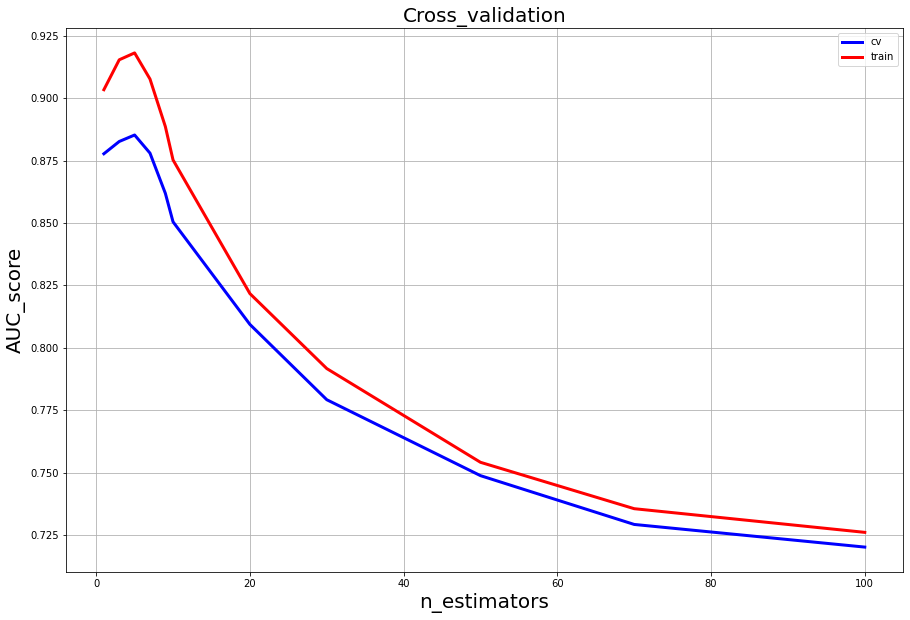

In [163]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [1,3,5,7,9,10,20,30,50,70,100]
auc_cv =[]
auc_tr = []
for i in params:
  model = GBDT(max_depth=7,n_estimators=i)
  model.fit(X_tr_tfidf,Y_tr)
  pred_tr = [j.max() for j in model.predict_proba(X_tr_tfidf)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv_tfidf)]
  auc_cv.append(1-roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(1-roc_auc_score(Y_tr,pred_tr))
  print('CV auc is {0} and train auc is {1} for estimators = {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),i))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('n_estimators',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()  

CV auc is 0.8785025188047754 and train auc is 0.9040725618267637 for max_depth = 0.0001
CV auc is 0.8778990407839349 and train auc is 0.9073307057064933 for max_depth = 0.001
CV auc is 0.8833696777310055 and train auc is 0.9146573424330612 for max_depth = 0.01
CV auc is 0.8113480781174522 and train auc is 0.8229989985663402 for max_depth = 0.1
CV auc is 0.6953443516665516 and train auc is 0.6862568816716659 for max_depth = 1
CV auc is 0.5019936512317991 and train auc is 0.501434034416826 for max_depth = 10
CV auc is 0.5 and train auc is 0.5 for max_depth = 100
CV auc is 0.5 and train auc is 0.5 for max_depth = 1000


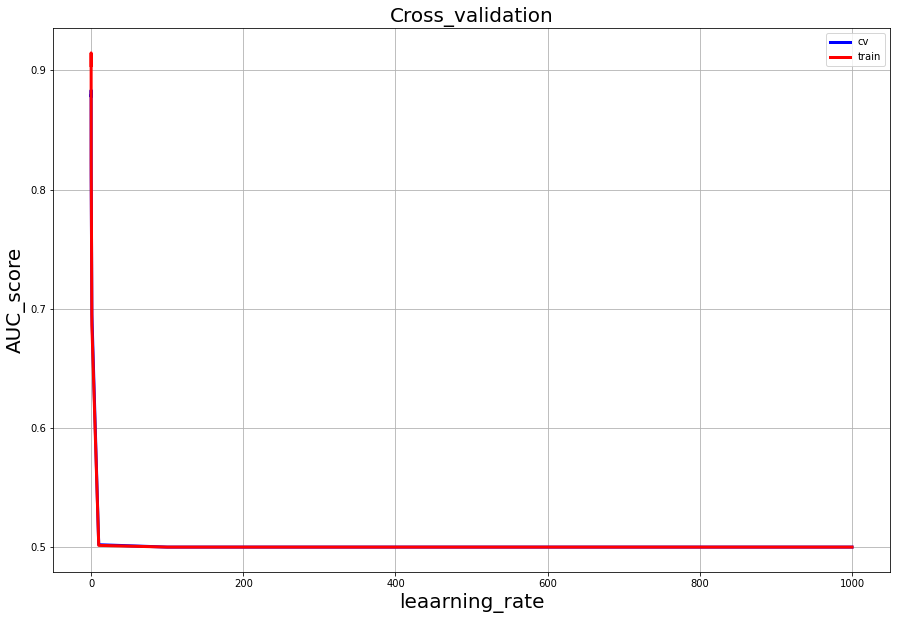

In [172]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [0.0001,0.001,0.01,0.1,1,10,100,1000]
auc_cv =[]
auc_tr = []
for i in params:
  model = GBDT(n_estimators=20,max_depth=7,learning_rate=i)
  model.fit(X_tr_tfidf,Y_tr)
  pred_tr = [j.max() for j in model.predict_proba(X_tr_tfidf)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv_tfidf)]
  auc_cv.append(1-roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(1-roc_auc_score(Y_tr,pred_tr))
  print('CV auc is {0} and train auc is {1} for max_depth = {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),i))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('leaarning_rate',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()  

# *Model Training: Using BOW vector data*

CV auc is 0.7740501000621075 and train auc is 0.760300289219796 for max_depth = 1
CV auc is 0.7576747636464012 and train auc is 0.7437929697019109 for max_depth = 2
CV auc is 0.7498040162859706 and train auc is 0.7376673190023311 for max_depth = 3
CV auc is 0.7407014698778552 and train auc is 0.7324592869708415 for max_depth = 4
CV auc is 0.7269142916292872 and train auc is 0.7317410707996512 for max_depth = 5
CV auc is 0.7165540680422331 and train auc is 0.7300690048039441 for max_depth = 7
CV auc is 0.7203578082948037 and train auc is 0.732505372102594 for max_depth = 9
CV auc is 0.7248071216617211 and train auc is 0.7353919499241206 for max_depth = 11
CV auc is 0.7439293354495894 and train auc is 0.759513282559258 for max_depth = 13
CV auc is 0.7572941825960942 and train auc is 0.7909815593530036 for max_depth = 17
CV auc is 0.7618190601062729 and train auc is 0.8116067914647038 for max_depth = 20


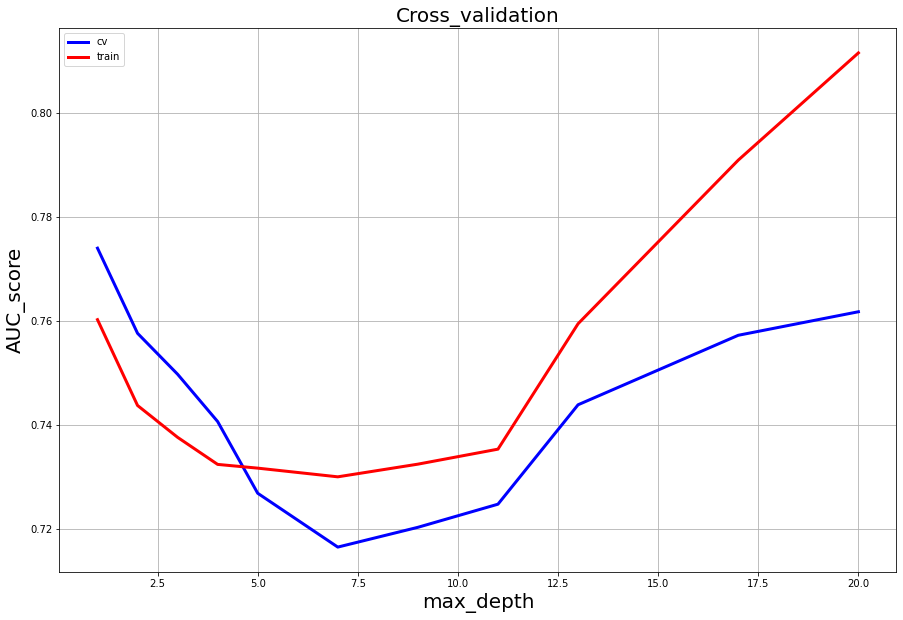

CV auc is 0.8792343523566352 and train auc is 0.9033326519228215 for estimators = 1
CV auc is 0.882787247256918 and train auc is 0.9150009202039315 for estimators = 3
CV auc is 0.8856911186253537 and train auc is 0.9180426513023583 for estimators = 5
CV auc is 0.8774518666758677 and train auc is 0.907574170085459 for estimators = 7
CV auc is 0.860547236215582 and train auc is 0.8866564285236842 for estimators = 9
CV auc is 0.8502794838175419 and train auc is 0.875424732563859 for estimators = 10
CV auc is 0.8099879235387482 and train auc is 0.8235295021277094 for estimators = 20
CV auc is 0.7740035194258506 and train auc is 0.788601543304887 for estimators = 30
CV auc is 0.7432792767924918 and train auc is 0.7585405116034118 for estimators = 50
CV auc is 0.7335629011110344 and train auc is 0.7417975209646135 for estimators = 70
CV auc is 0.7186826305983024 and train auc is 0.7268268595837741 for estimators = 100


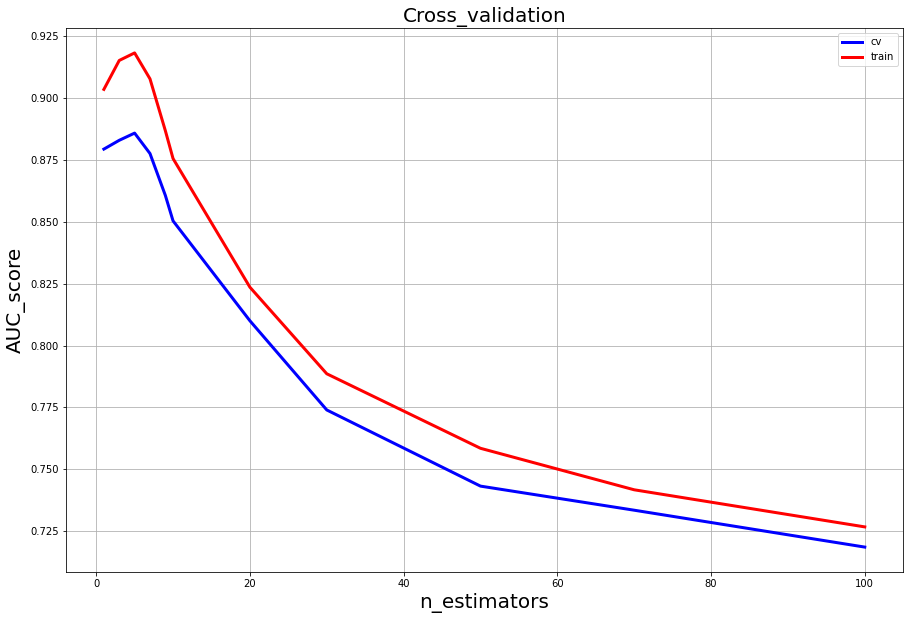

CV auc is 0.8785025188047754 and train auc is 0.9040034341291349 for learning_rate = 0.0001
CV auc is 0.877726519908909 and train auc is 0.9073325041506592 for learning_rate = 0.001
CV auc is 0.8828652266924298 and train auc is 0.9146241836187514 for learning_rate = 0.01
CV auc is 0.807007107860051 and train auc is 0.8213383976521911 for learning_rate = 0.1
CV auc is 0.7216054792629908 and train auc is 0.7028066519653847 for learning_rate = 1
CV auc is 0.5165916775929887 and train auc is 0.510917605179759 for learning_rate = 10
CV auc is 0.5 and train auc is 0.5011950286806883 for learning_rate = 100
CV auc is 0.5 and train auc is 0.5 for learning_rate = 1000


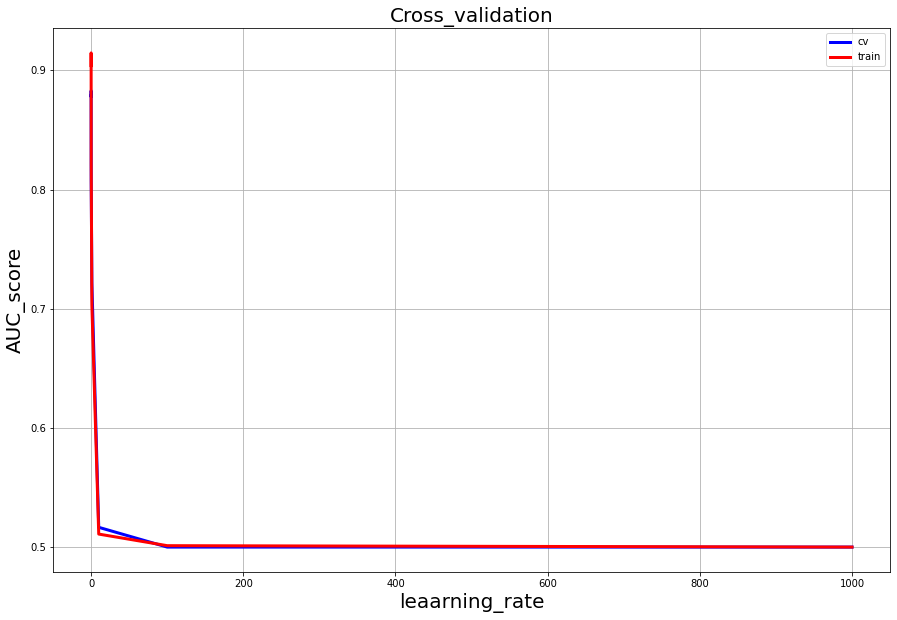

In [173]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [1,2,3,4,5,7,9,11,13,17,20]
auc_cv =[]
auc_tr = []
for i in params:
  model = GBDT(max_depth=i)
  model.fit(X_tr_bow,Y_tr)
  pred_tr = [j.max() for j in model.predict_proba(X_tr_bow)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv_bow)]
  auc_cv.append(1-roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(1-roc_auc_score(Y_tr,pred_tr))
  print('CV auc is {0} and train auc is {1} for max_depth = {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),i))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('max_depth',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()  


from sklearn.ensemble import GradientBoostingClassifier as GBDT 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [1,3,5,7,9,10,20,30,50,70,100]
auc_cv =[]
auc_tr = []
for i in params:
  model = GBDT(max_depth=7,n_estimators=i)
  model.fit(X_tr_bow,Y_tr)
  pred_tr = [j.max() for j in model.predict_proba(X_tr_bow)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv_bow)]
  auc_cv.append(1-roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(1-roc_auc_score(Y_tr,pred_tr))
  print('CV auc is {0} and train auc is {1} for estimators = {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),i))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('n_estimators',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()  


from sklearn.ensemble import GradientBoostingClassifier as GBDT 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [0.0001,0.001,0.01,0.1,1,10,100,1000]
auc_cv =[]
auc_tr = []
for i in params:
  model = GBDT(n_estimators=20,max_depth=7,learning_rate=i)
  model.fit(X_tr_bow,Y_tr)
  pred_tr = [j.max() for j in model.predict_proba(X_tr_bow)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv_bow)]
  auc_cv.append(1-roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(1-roc_auc_score(Y_tr,pred_tr))
  print('CV auc is {0} and train auc is {1} for learning_rate = {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),i))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('leaarning_rate',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()  

# *Best_model: <br>vectorizer = TFIDF<br>Max_depth = 7<br>n_estimators=20,<br>learning rate=0.1*



# *<br>vectorizer = BOW<br>Max_depth = 10<br>n_estimators=20,<br>learning rate=0.01*

In [ ]:
best_model = GBDT(n_estimators=20,max_depth=7,learning_rate=0.1)
pickle.dump(best_model,open('best_model.sav','wb'))

In [177]:
best_model.fit(X_tr_tfidf,Y_tr)
pred_tr = [j.max() for j in best_model.predict_proba(X_tr_tfidf)]
pred_cv = [j.max() for j in best_model.predict_proba(X_cv_tfidf)]
pred_test = [j.max() for j in best_model.predict_proba(X_test_tfidf)]
print('CV auc is {0} and train auc is {1} and test auc is {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),1-roc_auc_score(Y_test,pred_test)))

CV auc is 0.8093037057483956 and train auc is 0.8210505716504652 and test auc is 0.8165815984999361


In [179]:
best_model_bow = GBDT(n_estimators=20,max_depth=10,learning_rate=0.01)
#pickle.dump(best_model,open('best_model.sav','wb'))

best_model_bow.fit(X_tr_bow,Y_tr)
pred_tr = [j.max() for j in best_model_bow.predict_proba(X_tr_bow)]
pred_cv = [j.max() for j in best_model_bow.predict_proba(X_cv_bow)]
pred_test = [j.max() for j in best_model_bow.predict_proba(X_test_bow)]
print('CV auc is {0} and train auc is {1} and test auc is {2}'.format(1-roc_auc_score(Y_cv,pred_cv),1-roc_auc_score(Y_tr,pred_tr),1-roc_auc_score(Y_test,pred_test)))

CV auc is 0.8837989096680698 and train auc is 0.9369262026420944 and test auc is 0.8367958144646643


# *Model Peformance*

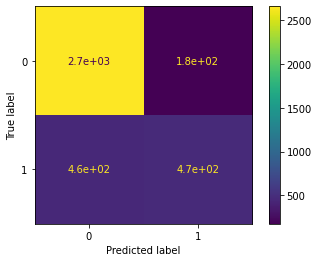

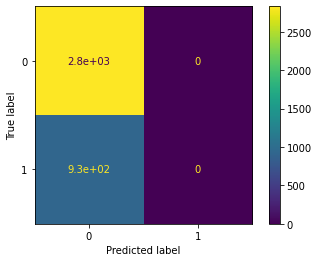

In [186]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model,X_test_tfidf,Y_test)
plot_confusion_matrix(best_model_bow,X_test_bow,Y_test)
plt.show()

# ***Conclusion: Clearly BOW model is underfitting the data as it is only predicting class 0 as 100% correctly and class 1 as 0 % correctly. Hence we can say that it is just a dumb model.***

# *Model selected : model with tfidf vectorizer(best_model)*

In [187]:
print(accuracy_score(Y_test,best_model.predict(X_test_tfidf)))

0.8308100929614873


In [188]:
print(accuracy_score(Y_test,best_model_bow.predict(X_test_bow)))


0.751925630810093
